# Interpolação

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A interpolação é uma técnica utilizada para estimar valores de uma função em pontos que não estão diretamente disponíveis, preenchendo as lacunas entre um conjunto discreto de pontos. Essa técnica assume um modelo ou comportamento para os dados entre os pontos amostrados. 

Existem diversos tipos de interpolação, cada um com características distintas:
* Alguns métodos garantem que não serão introduzidos novos extremos (pontos de máximo ou mínimo) durante a interpolação.
* Outros preservam a quantidade sendo interpolada, como a área ou o volume, ao longo do intervalo.
* Há também métodos que asseguram que a derivada da função seja contínua nos pontos finais, garantindo uma transição suave.

Para ver a lista completa acesse a documentação: https://scipy.github.io/devdocs/tutorial/interpolate.html

É importante destacar que, apesar de ser útil em muitas situações, a interpolação pode apresentar problemas, como no caso do uso de polinômios de alta ordem, que podem levar a resultados imprecisos ou indesejados, como oscilações excessivas entre os pontos de dados.


A função `interp1d()` permite uma variedade de métodos de interpolação unidimensional. Ela retorna um objeto que se comporta como uma função, que pode ser avaliada em qualquer ponto desejado.

In [ ]:
import scipy.interpolate as interpolate

In [ ]:
#help(interpolate.interp1d)

Como um exemplo, vamos considerar a função

$$f(x) = x \sin(x)$$

para gerar um conjunto de pontos e depois interpolar tal conjunto de dados.

Vamos começar gerando esse conjunto e plotando ele juntamente com a função exata

In [ ]:
def f_exact(x):
    return np.sin(x)*x

In [ ]:
N = 10
x = np.linspace(0, 20, N)

y = f_exact(x)

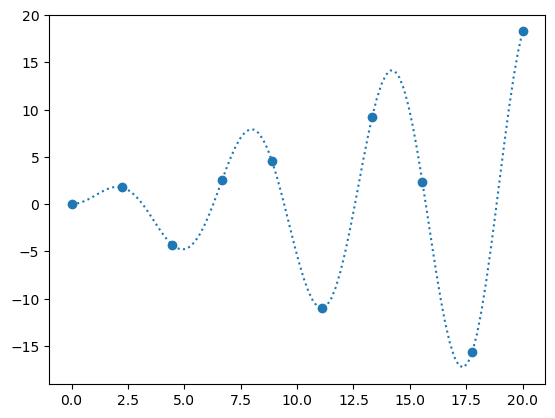

In [ ]:
fig, ax = plt.subplots()

x_fine = np.linspace(0, 20, 10*N)

ax.scatter(x, y)
ax.plot(x_fine, f_exact(x_fine), ls=":", label="função original")

A interpolação de dados unidimensionais pode ser feita usando a função `interp1d` da biblioteca `scipy.interpolate`. Essa função cria uma interpoladora para estimar valores de `y` para novos pontos de `x`, com base em dados fornecidos.

A sintaxe básica é:

```python
f_interp = interpolate.interp1d(x, y, kind="cubic")
```

Onde:
- `x` e `y` são os arrays de dados conhecidos.
- `kind` define o tipo de interpolação. Basecimamente, os três tipos mais usados são:
  - `"linear"`: Realiza uma interpolação linear, ou seja, conecta os pontos com segmentos de reta, criando uma transição direta e sem curvas.
  - `"quadratic"`: Utiliza uma interpolação quadrática, ajustando um polinômio de grau 2 para passar pelos pontos, criando uma curva suave, mas com menor flexibilidade que a cúbica.
  - `"cubic"`: Utiliza uma interpolação cúbica, que ajusta um polinômio de grau 3 para garantir uma transição suave entre os pontos.
- `f_interp` é a função gerada, que pode ser usada para calcular valores interpolados para novos pontos de `x`.



In [ ]:
f_interp_linear = interpolate.interp1d(x, y, kind="linear")
f_interp_quadratic = interpolate.interp1d(x, y, kind="quadratic")
f_interp_cubic = interpolate.interp1d(x, y, kind="cubic")

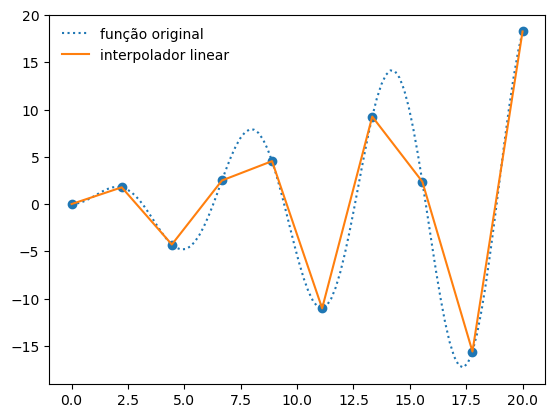

In [ ]:
ax.plot(x_fine, f_interp_linear(x_fine), label="interpolador linear")

ax.legend(frameon=False, loc="best")
fig

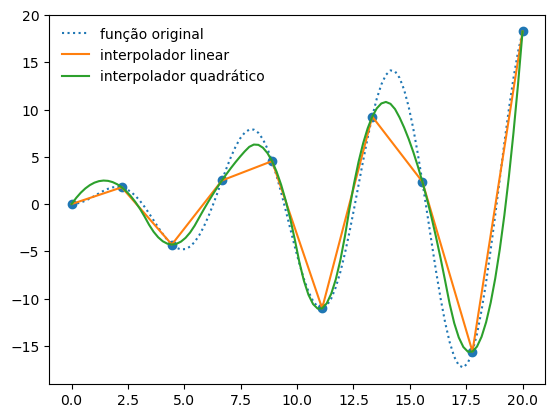

In [ ]:
ax.plot(x_fine, f_interp_quadratic(x_fine), label="interpolador quadrático")

ax.legend(frameon=False, loc="best")
fig

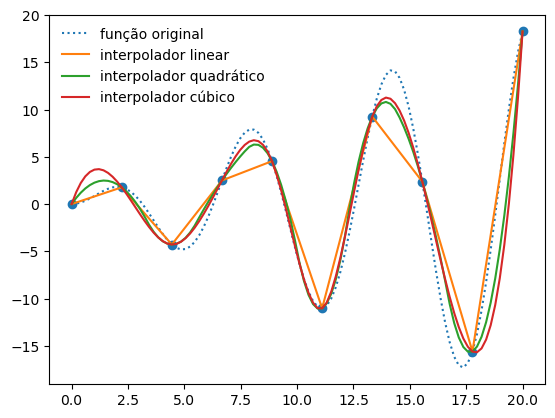

In [ ]:
ax.plot(x_fine, f_interp_cubic(x_fine), label="interpolador cúbico")

ax.legend(frameon=False, loc="best")
fig

Observe que o interpolador retorna uma função, assim caso desejamos saber qual o valor que esse interpolador irá retornar num valor arbitrário de $x_0$, basta aplicar `f_interp(x_0)`

In [ ]:
print(f_interp_linear(5))
print(f_interp_quadratic(5))
print(f_interp_cubic(5))

-2.590805005477228
-3.6967977411255415
-3.7264323211400803
